In [2]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import scipy.optimize as opt

# intial conditions
Eps = 6.1
a = 0.03568

In [7]:
def roots_different_freq(p, q, m, ini1, ini2, ini3, ini4):
    
    #m is the number of intervals to slice the frequency domain
    
    # Generate different frequencies
    ff = np.linspace(p, q, m) # generating m equally spaced frequencies from p to q GHz

    # related  k0 values
    k_array = (20*(np.pi)*ff)/3
    
    print('The roots of the equations for given frequency range: ')
    
    for i in range(m):
        k0 = k_array[i]
        # Generate data points for the x-axis
        xarr = np.linspace(0, 10, 100)

        # Define the function to be plotted (right hand side)
        def rhs_function(x):
            rhsarr =((1/(x**2))-(Eps/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))*((1/(x**2))-(1/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))
            return rhsarr

        # Define the function to be plotted (kc1 and kc2 values/  x and y)
        def y_value(x):
            y = np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2)))
            return y

        # (left hand side)

        def lhs_function(x): 

            a = 0.03568
            b = 0.05567
            n = 1

            y = np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2)))

            rmori = ((sp.yn(n, ((b/a)*y)))*(sp.jn(n, y)))-((sp.jn(n, ((b/a)*y)))*(sp.yn(n, y)))
            rmder = ((sp.yn(n, ((b/a)*y)))*(sp.jvp(n, y)))-((sp.jn(n, ((b/a)*y)))*(sp.yvp(n, y)))
            smori = ((sp.yvp(n, ((b/a)*y)))*(sp.jn(n, y)))-((sp.jvp(n, ((b/a)*y)))*(sp.yn(n, y)))
            smder = ((sp.yvp(n, ((b/a)*y)))*(sp.jvp(n, y)))-((sp.jvp(n, ((b/a)*y)))*(sp.yvp(n, y)))

            lhsarr = (((sp.jvp(n, x))/(x*sp.jn(n, x)))-((Eps*rmder)/(y*rmori)))*(((sp.jvp(n, x))/(x*sp.jn(n, x)))-((smder)/(y*smori)))

            return lhsarr

        yrhs = rhs_function(xarr)
        ylhs = lhs_function(xarr)

        #x0 = np.array([0.9, 2.7, 3.4, 4]) # initial guesses (looking at the graph)
        x0 = np.array([ini1, ini2, ini3, ini4]) # initial guesses (looking at the graph)

        # Define the difference between the two functions as a function of x
        def func_diff(x):
            return lhs_function(x)- rhs_function(x)

        # Use the root function to find the root of the difference
        root = opt.root(func_diff, x0)

        rootxval = root.x

        # Print the root
        
        print(root.x)

In [4]:
roots_different_freq()

<ipython-input-3-50d05aae4130>:18: RuntimeWarning: divide by zero encountered in true_divide
  rhsarr =((1/(x**2))-(Eps/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))*((1/(x**2))-(1/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))
<ipython-input-3-50d05aae4130>:18: RuntimeWarning: invalid value encountered in subtract
  rhsarr =((1/(x**2))-(Eps/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))*((1/(x**2))-(1/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))
<ipython-input-3-50d05aae4130>:36: RuntimeWarning: invalid value encountered in multiply
  rmori = ((sp.yn(n, ((b/a)*y)))*(sp.jn(n, y)))-((sp.jn(n, ((b/a)*y)))*(sp.yn(n, y)))
C:\Users\Maleesh Rathnasiri\anaconda3\lib\site-packages\scipy\special\_basic.py:609: RuntimeWarning: invalid value encountered in add
  s += p*L(v-n + i*2, z)
<ipython-input-3-50d05aae4130>:41: RuntimeWarning: divide by zero encountered in true_divide
  lhsarr = (((sp.jvp(n, x))/(x*sp.jn(n, x)))-((Eps*rmder)/(y*rmori)))*(((sp.jvp(n, x))/(x*sp.jn(n, x)))-((s

[1.18005097 2.92271031 3.41702673 4.06870381]
[1.17951698 2.92167539 3.41651715 4.0685089 ]
[1.17790988 2.9185675  3.41498731 4.06792542]
[1.17521416 2.91337725 3.41243401 4.06695717]
[1.17140349 2.90608907 3.40885188 4.06561039]
[1.16644007 2.89668128 3.40423343 4.06389365]
[1.16027353 2.88512622 3.39856904 4.06181774]
[1.15283956 2.87139041 3.39184704 4.05939543]
[1.14405797 2.85543479 3.38405367 4.05664129]
[1.13383022 2.83721488 3.37517319 4.05357144]
[1.12203618 2.81668115 3.3651879  4.05020325]
[1.10852987 2.79377928 3.35407827 4.04655508]
[1.09313397 2.76845057 3.34182297 4.04264596]
[1.07563242 2.7406324  3.32839906 4.03849532]
[1.05576064 2.71025874 3.31378213 4.03412264]
[1.03319207 2.6772609  3.29794652 4.02954722]
[1.00751952 2.64156824 3.28086551 4.02478788]
[0.9782284  2.6031093  3.2625117  4.01986269]
[0.94465733 2.56181302 3.24285733 4.0147888 ]
[0.90593754 2.5176104  3.22187473 4.00958222]


In [8]:
roots_different_freq(0,1,20,0.9, 2.7, 3.4, 4)

The roots of the equations for given frequency range: 
[1.18005097 2.92271031 3.41702673 4.06870381]
[1.17951698 2.92167539 3.41651715 4.0685089 ]
[1.17790988 2.9185675  3.41498731 4.06792542]
[1.17521416 2.91337725 3.41243401 4.06695717]
[1.17140349 2.90608907 3.40885188 4.06561039]
[1.16644007 2.89668128 3.40423343 4.06389365]
[1.16027353 2.88512622 3.39856904 4.06181774]
[1.15283956 2.87139041 3.39184704 4.05939543]
[1.14405797 2.85543479 3.38405367 4.05664129]
[1.13383022 2.83721488 3.37517319 4.05357144]
[1.12203618 2.81668115 3.3651879  4.05020325]
[1.10852987 2.79377928 3.35407827 4.04655508]
[1.09313397 2.76845057 3.34182297 4.04264596]
[1.07563242 2.7406324  3.32839906 4.03849532]
[1.05576064 2.71025874 3.31378213 4.03412264]
[1.03319207 2.6772609  3.29794652 4.02954722]


<ipython-input-7-faa811140539>:20: RuntimeWarning: divide by zero encountered in true_divide
  rhsarr =((1/(x**2))-(Eps/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))*((1/(x**2))-(1/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))
<ipython-input-7-faa811140539>:20: RuntimeWarning: invalid value encountered in subtract
  rhsarr =((1/(x**2))-(Eps/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))*((1/(x**2))-(1/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))
<ipython-input-7-faa811140539>:38: RuntimeWarning: invalid value encountered in multiply
  rmori = ((sp.yn(n, ((b/a)*y)))*(sp.jn(n, y)))-((sp.jn(n, ((b/a)*y)))*(sp.yn(n, y)))
<ipython-input-7-faa811140539>:43: RuntimeWarning: divide by zero encountered in true_divide
  lhsarr = (((sp.jvp(n, x))/(x*sp.jn(n, x)))-((Eps*rmder)/(y*rmori)))*(((sp.jvp(n, x))/(x*sp.jn(n, x)))-((smder)/(y*smori)))


[1.00751952 2.64156824 3.28086551 4.02478788]
[0.9782284  2.6031093  3.2625117  4.01986269]
[0.94465733 2.56181302 3.24285733 4.0147888 ]
[0.90593754 2.5176104  3.22187473 4.00958222]


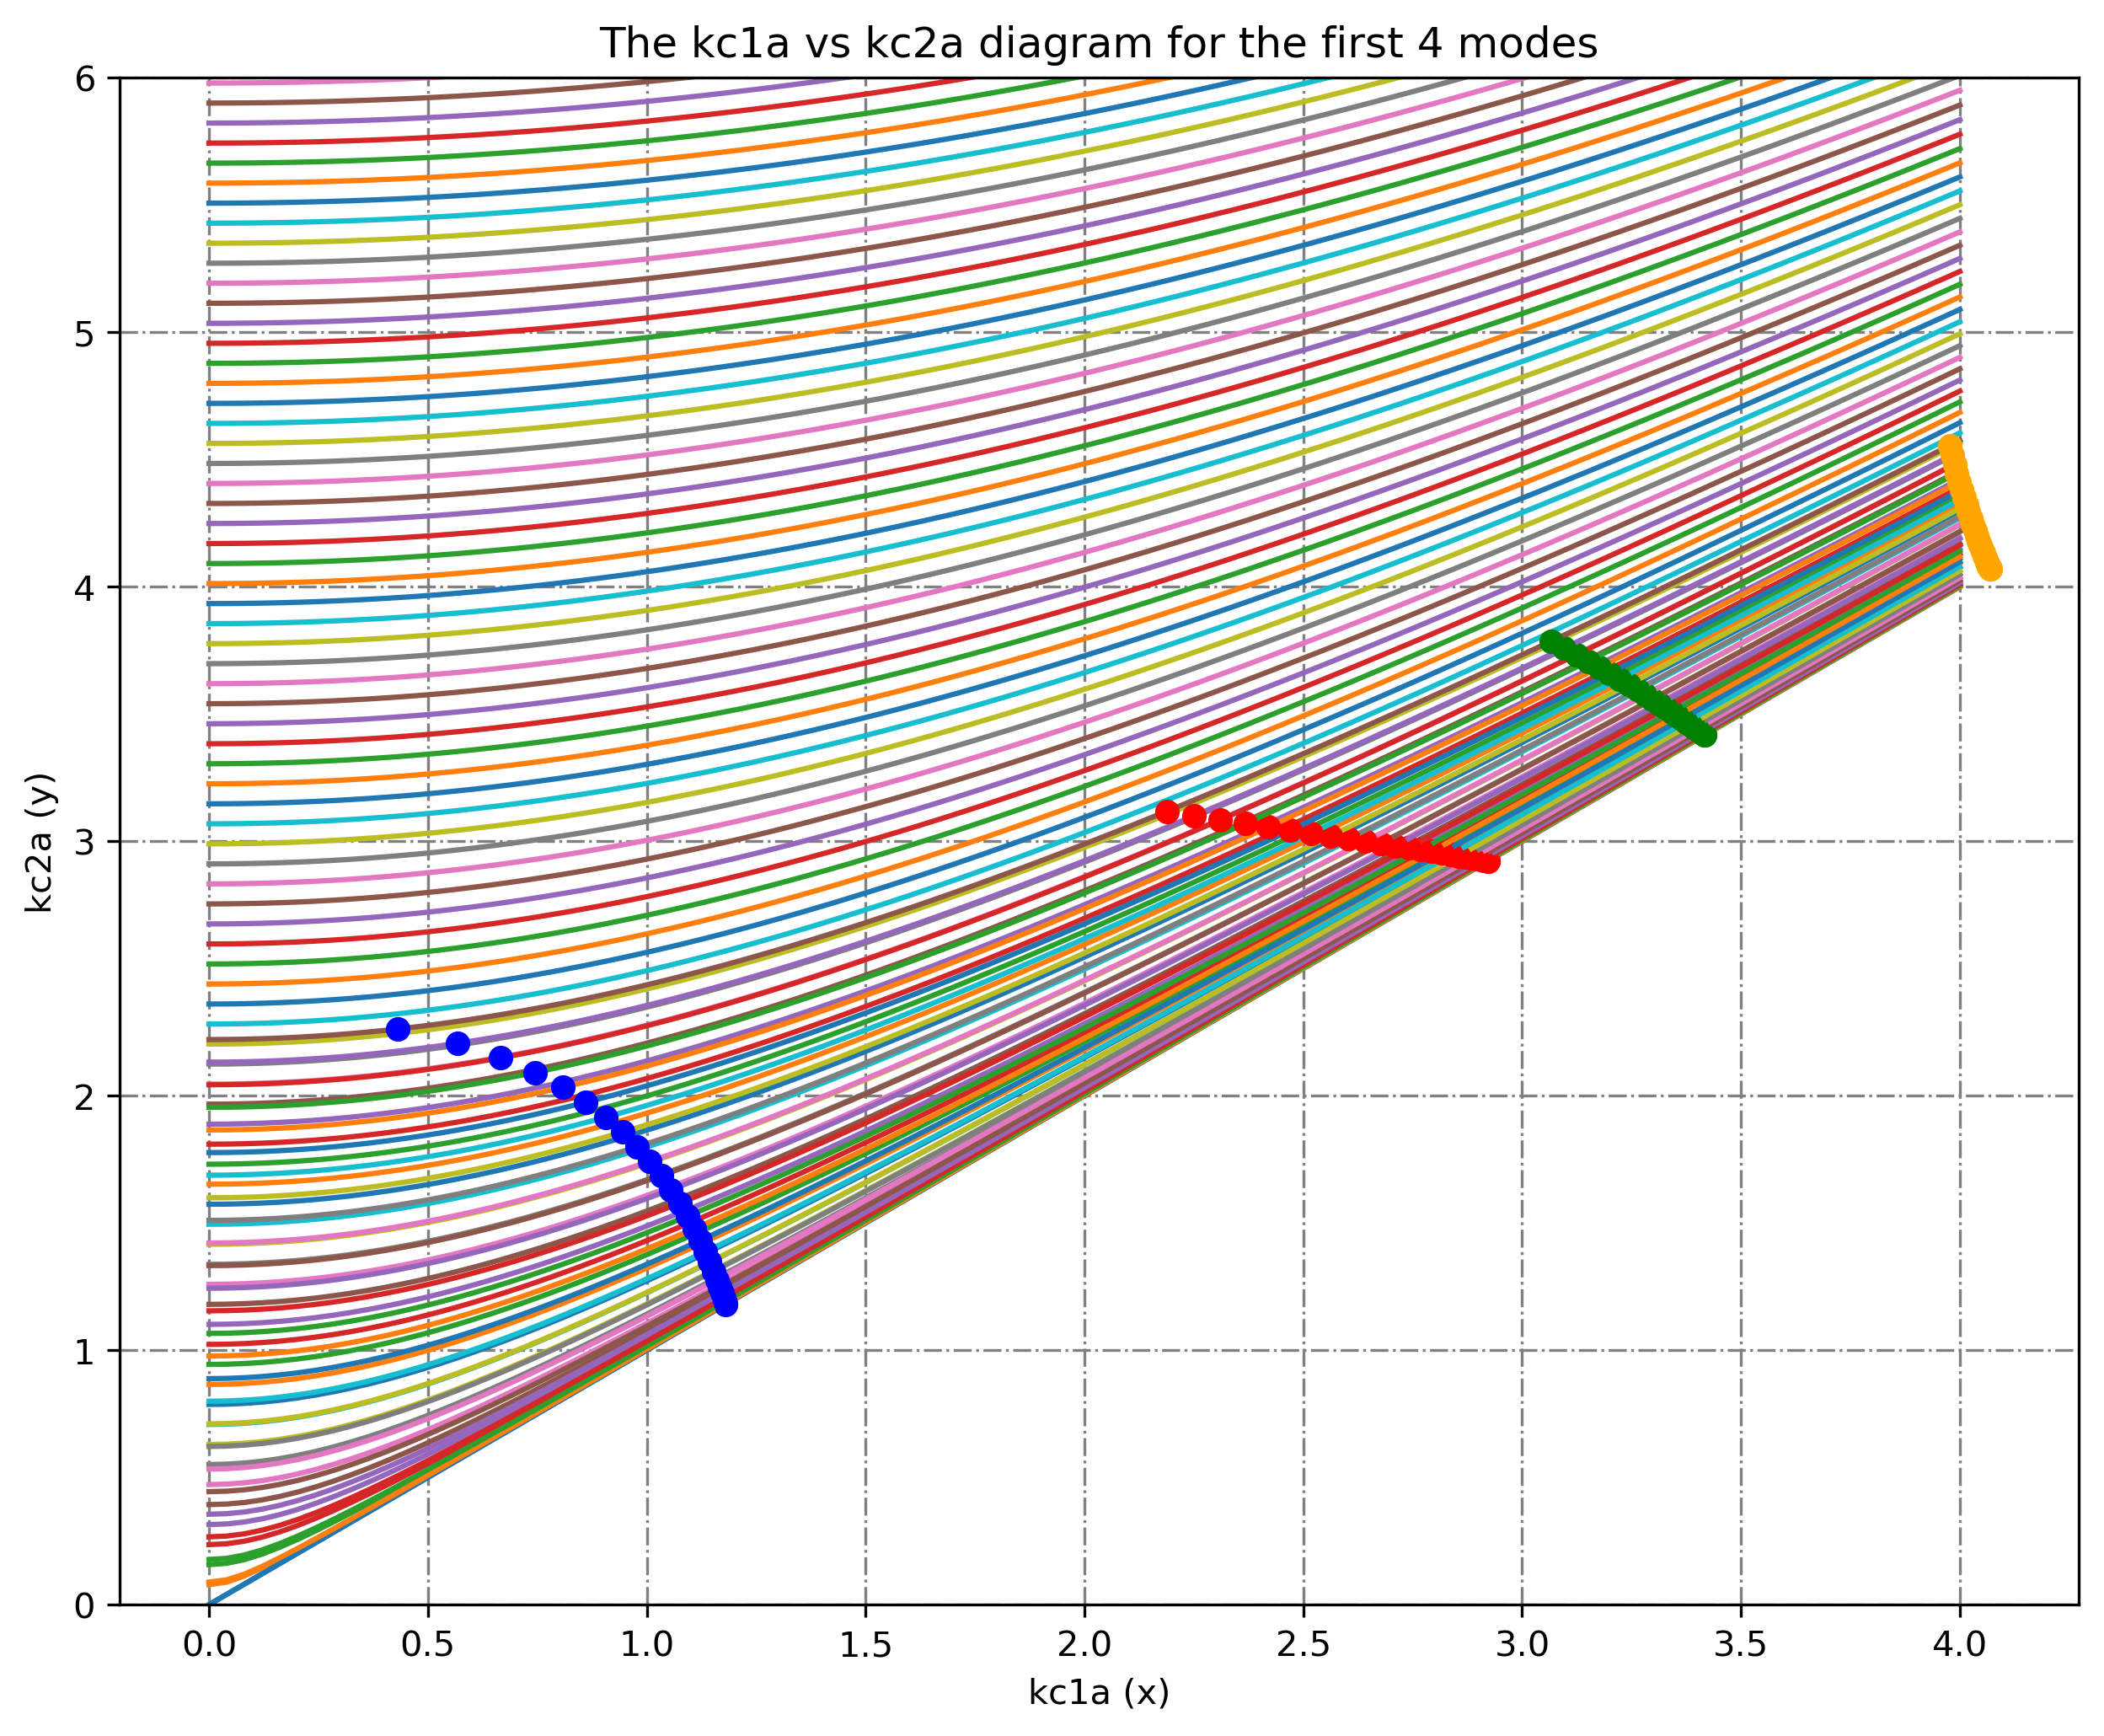

In [17]:
# the complete set of k values with proper set of intersections
# this set of k values were manually chosen looking at the roots by running the previous code

selected_k_upper = np.array([ 0.        ,  1.10231321,  2.20462642,  3.30693964,  4.40925285,
        5.51156606,  6.61387927,  7.71619248,  8.81850569,  9.92081891,
       11.02313212, 12.12544533, 13.22775854, 14.33007175, 15.43238497,
       16.53469818, 17.63701139, 18.7393246 , 19.84163781, 20.94395102, 
                22.04626424, 23.14857745, 24.25089066, 25.35320387,
       26.45551708, 27.55783029])

# let's generate the y values (kc2a) to draw the plots related to these selected k values

m = len(selected_k_upper)

# this is our y curves
y_curve_for_selected_k_upper = [0 for _ in range(m)]

for i in range(m):
    k0 = selected_k_upper[i]
    # Generate data points for the x-axis
    x_array = np.linspace(0, 4, 100)
    
    # Define the function to be plotted (kc1 and kc2 values/  x and y)
    def y_value(x):
        y = np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2)))
        return y
    
    y_curve_for_selected_k_upper[i] = y_value(x_array)
    
# let's manually write the roots (intersecting points) to draw the plots 
# this is obtained using the previous results

selected_roots_upper = np.array([[1.18005097, 2.92271031, 3.41702673, 4.06870381],
[1.17951698, 2.92167539, 3.41651715, 4.0685089 ],
[1.17790988, 2.9185675,  3.41498731, 4.06792542],
[1.17521416, 2.91337725, 3.41243401, 4.06695717],
[1.17140349, 2.90608907, 3.40885188, 4.06561039],
[1.16644007, 2.89668128, 3.40423343, 4.06389365],
[1.16027353, 2.88512622, 3.39856904, 4.06181774],
[1.15283956, 2.87139041, 3.39184704, 4.05939543],
[1.14405797, 2.85543479, 3.38405367, 4.05664129],
[1.13383022, 2.83721488, 3.37517319, 4.05357144],
[1.12203618, 2.81668115, 3.3651879,  4.05020325],
[1.10852987, 2.79377928, 3.35407827, 4.04655508],
[1.09313397, 2.76845057, 3.34182297, 4.04264596],
[1.07563242, 2.7406324 , 3.32839906, 4.03849532],
[1.05576064, 2.71025874, 3.31378213, 4.03412264],
[1.03319207, 2.6772609,  3.29794652, 4.02954722],
[1.00751952, 2.64156824, 3.28086551, 4.02478788],
[0.9782284, 2.6031093,  3.2625117,  4.01986269],
[0.94465733, 2.56181302, 3.24285733, 4.0147888 ],
[0.90593754, 2.5176104,  3.22187473, 4.00958222],
[0.86089485, 2.47043645, 3.19953685, 4.00425765],
[0.80788054, 2.42023269, 3.17581797, 3.99882837],
[0.74445236, 2.36694973, 3.15069443, 3.99330618],
[0.66669512, 2.3105506,  3.12414558, 3.98770126],
[0.56748292, 2.25101347, 3.09615486, 3.98202223],
[0.43038382, 2.18833359, 3.06671146, 3.97627606]])

colors = ['blue', 'red', 'green', 'orange', 'purple']

# finding the y values for the selected x roots (above)
m = len(selected_k_upper)

# this is the y value related to x
y_value_for_selected_roots_upper = [0 for _ in range(m)]

for i in range(m):
    k0 = selected_k_upper[i]
    
    # Define the function to be plotted (kc1 and kc2 values/  x and y)
    def y_value(x):
        y = np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2)))
        return y
    
    y_value_for_selected_roots_upper[i] = y_value(selected_roots_upper[i])
    

# we want to mark the rest of the k values related to different frequencies from 0 GHz to 18.6 GHz.   
# In the graph it is related to marking the upper section

Eps = 6.1
a = 0.03568

# Generate different frequencies
m = 400
ff = np.linspace(0, 18.6, m) # different frequencies from 0 GHz to 18.6 GHz.   

all_k_upper = (20*(np.pi)*ff)/3

# generating related curves
y_curve_for_all_k_upper = [0 for _ in range(m)]

for i in range(m):
    k0 = all_k_upper[i]
    # Generate data points for the x-axis
    x_array = np.linspace(0, 4, 100)
    
    # Define the function to be plotted (kc1 and kc2 values/  x and y)
    def y_value(x):
        y = np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2)))
        return y
    
    y_curve_for_all_k_upper[i] = y_value(x_array)
    
# drawing results    
    
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

x_array = np.linspace(0, 4, 100)

# Plot the second function
for i in range(len(y_curve_for_all_k_upper)):
    ax.plot(x_array, y_curve_for_all_k_upper[i])

for i in range(len(y_curve_for_selected_k_upper)):
    # Plot the function
    ax.plot(x_array, y_curve_for_selected_k_upper[i])

    x_value_selected_root = selected_roots_upper[i]
    y_value_selected_root = y_value_for_selected_roots_upper[i]
    
    # Plot the second function
    for i in range(len(x_value_selected_root)):
        ax.plot(x_value_selected_root[i], y_value_selected_root[i], 'o', color=colors[i], label='')

# Add labels and a title
ax.set_xlabel('kc1a (x)')
ax.set_ylabel('kc2a (y)')
ax.set_title('The kc1a vs kc2a diagram for the first 4 modes')

# Limit the y-axis values
ax.set_ylim(0, 6)

# Add a grid to the plot
ax.grid(True, linestyle='-.', color='grey')

# Show the plot
plt.show()